In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

D:\Chem_conditions\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_full = pd.read_csv('../data/interim/dataset_smiles_descriptors_classified_2.tsv', sep="\t")

C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\2773495151.py:1: DtypeWarning: Columns (5,6,10,11,12,24,31,34,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('../data/interim/dataset_smiles_descriptors_classified_2.tsv', sep="\t")


In [6]:
df_full.head()

,reaction_id,reactants,products,stages_number,yield_value,reagents_1,catalysts_1,solvents_1,temperature_1,pressure_1,...,catalysts_1_II_NumberMetalAtoms,reagents_1_smiles,reagents_1_org/inorg,reagents_1_upclass,reagents_1_II_smiles,reagents_1_II_org/inorg,reagents_1_II_upclass,reaction_smiles,reaction_drfp,class
0,31-172-CAS-18978708,122-39-4,4316-57-8,1,71,Sodium tert-butoxide,Palladium diacetate,NaN,NaN,NaN,...,0.0,[Na+].CC(C)(C)[O-],o,Organic salt,[Na+].[Na+].[O-][S]([O-])(=O)=O,i,Inorganic salt,N(c1ccccc1)c2ccccc2.[O-][N+](=O)c1ccc(Cl)cc1>>...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
1,31-144-CAS-20809214,106-38-7,1216-95-1,1,91,Cesium carbonate,Palladium diacetate,Dimethylformamide,25.0,NaN,...,NaN,[Cs+].[Cs+].[O-]C([O-])=O,i,Inorganic salt,[Na+].[Na+].[O-][S]([O-])(=O)=O,i,Inorganic salt,Cc1ccc(Br)cc1.COc1ccc(cc1)C(O)=O>>CC1=CC=C(C=C...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. ...,0
2,31-309-CAS-11061124,1001427-55-9,1001427-60-6,1,83,Triethylamine,NaN,Dichloromethane,25.0,NaN,...,NaN,CCN(CC)CC,o,Amine,[Na+].[Na+].[O-][S]([O-])(=O)=O,i,Inorganic salt,Cl.O=C(OC)CC(N)CC=1C=CC=CC1.O=Cc1ccccc1>>O=C(O...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. ...,0
3,31-311-CAS-14967007,4229-44-1,16089-69-3,1,95,Sodium carbonate,NaN,NaN,25.0,NaN,...,NaN,[Na+].[Na+].[O-]C([O-])=O,i,Inorganic salt,[Na+].[Na+].[O-][S]([O-])(=O)=O,i,Inorganic salt,[H+].[Cl-].CNO.CN(C)c1ccc(C=O)cc1>>CN(C)c1ccc(...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. ...,0
4,31-614-CAS-26958594,1028801-18-4,2227266-52-4,1,50,Pyridine,Cupric acetate,"1,2-Dichloroethane",25.0,NaN,...,NaN,c1ccncc1,o,Heterocyclic cmpd.,[Na+].[Na+].[O-][S]([O-])(=O)=O,i,Inorganic salt,ON=C(C=CC=1C=CC=CC1)C=CC=2C=CC=CC2.OB(O)C1=CCO...,[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. ...,2


In [7]:
def to_array_str(x):
    return np.fromstring(x[1:-1].replace('\n', ''), sep=' ')


df_full.reaction_drfp = df_full.reaction_drfp.apply(to_array_str)

In [8]:
df_full_fp = pd.DataFrame(df_full.reaction_drfp.values.tolist())

## RandomizedSearchCV

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_full_fp, df_full['yield_value'], test_size=0.25, 
                                                    random_state=42, shuffle=True)

C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\1081498224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)
C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\1081498224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<AxesSubplot: xlabel='yield_value', ylabel='Density'>

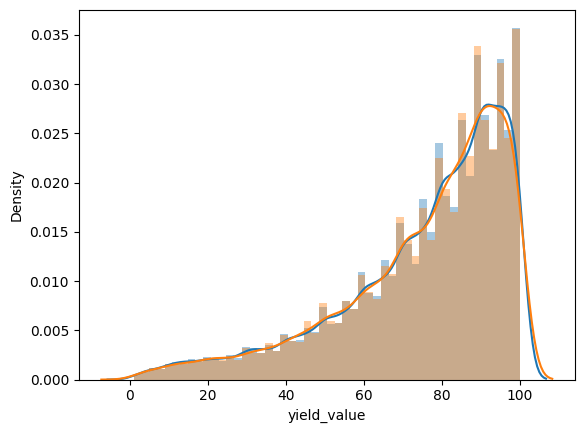

In [26]:
sns.distplot(y_train)
sns.distplot(y_test)

<AxesSubplot: ylabel='Frequency'>

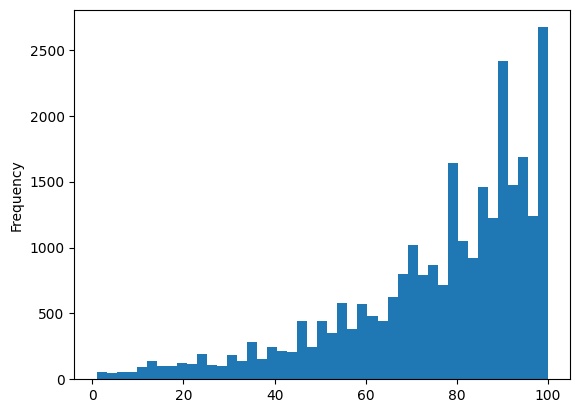

In [16]:
y_test.plot.hist(bins=45)

In [32]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1, 10, 100]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'eval_metric': ['rmse'],
    }

In [35]:
regressor = xgb.XGBRegressor()

In [36]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True,
            random_state=42)

In [37]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 10, 100],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [39]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.05}

In [42]:
random_cv.cv_results_


{'mean_fit_time': array([270.23113236,  66.17549543,  57.37593389,  92.36531591,
         76.71216288,  34.5218895 , 136.69714713, 193.79196811,
          6.98315992,   9.05708795,  58.97103057, 218.12669454,
        422.83998713,  27.67540078, 113.57203226, 175.52392716,
        657.87922764, 219.16546025, 384.13169799,   8.61866431,
         65.60753436, 134.04506798, 119.50351548,   8.6981317 ,
        119.5915482 , 109.56119008, 114.77418299,  35.39023981,
         53.67191329,  65.86751828,  72.11779876,  89.15319438,
        133.43626585, 120.81611991,  37.52314563, 181.38562112,
         54.01530075,   8.71438007, 130.38863144, 395.31788888,
         87.92794309,  30.40178547, 212.73583779,  42.52765412,
         54.23768787, 465.98043771,  89.91988869,  89.72686448,
         61.26465392,  30.18454657]),
 'std_fit_time': array([ 7.59200425,  1.00229938,  1.55842127,  2.2395282 ,  2.50546634,
         1.23601936,  1.92841721,  2.93051773,  0.06687124,  0.06665178,
         2.6169

In [44]:
params = {'n_estimators': 1100,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.05}

In [45]:
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
y_pred = model.predict(X_test)

In [52]:
print("                   MAE        MSE          RMSE         MedAE       R2")
print("         Model: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
    .format(mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test,y_pred),
            mean_squared_error(y_test,y_pred,squared=False),
            median_absolute_error(y_test,y_pred),
            r2_score(y_test,y_pred)))

                   MAE        MSE          RMSE         MedAE       R2
         Model: 14.04152069 378.41924836 19.45300101 10.24537659 0.16657122


## Optuna

In [55]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.25, 
                                                    random_state=42, shuffle=True)

In [60]:
def objective(trial):
    """Define the objective function"""

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**param)
    optuna_model.fit(X_train_, y_train_)

    # Make predictions
    y_pred = optuna_model.predict(X_test_)

    # Evaluate predictions
    return mean_squared_error(y_test_, y_pred)

In [61]:
study = optuna.create_study(direction="minimize", study_name='regression')
study.optimize(objective, n_trials=50)

[I 2023-03-29 21:13:52,492] A new study created in memory with name: regression
[I 2023-03-29 21:14:34,753] Trial 0 finished with value: 627.7017279817696 and parameters: {'max_depth': 8, 'learning_rate': 0.5687359965461308, 'n_estimators': 328, 'min_child_weight': 10, 'gamma': 0.1348600902239844, 'subsample': 0.34188237636806607, 'colsample_bytree': 0.550086508913876, 'reg_alpha': 0.3065223581571591, 'reg_lambda': 0.7142722369931621, 'random_state': 237}. Best is trial 0 with value: 627.7017279817696.
[I 2023-03-29 21:14:55,762] Trial 1 finished with value: 1009.0126860307929 and parameters: {'max_depth': 5, 'learning_rate': 0.6840143030558498, 'n_estimators': 407, 'min_child_weight': 10, 'gamma': 0.8265261032849303, 'subsample': 0.17143491731414906, 'colsample_bytree': 0.24530342775319816, 'reg_alpha': 0.5616604538824603, 'reg_lambda': 0.48898725489294803, 'random_state': 38}. Best is trial 0 with value: 627.7017279817696.
[I 2023-03-29 21:16:45,599] Trial 2 finished with value: 516.

[I 2023-03-29 21:25:09,271] Trial 19 finished with value: 408.60757316125273 and parameters: {'max_depth': 3, 'learning_rate': 0.1532896941098493, 'n_estimators': 495, 'min_child_weight': 3, 'gamma': 0.011944030860080751, 'subsample': 0.8520954488623871, 'colsample_bytree': 0.8037129803005167, 'reg_alpha': 0.9967833533550204, 'reg_lambda': 0.5841186681466355, 'random_state': 375}. Best is trial 18 with value: 395.9687272665475.
[I 2023-03-29 21:25:37,592] Trial 20 finished with value: 401.05209611486214 and parameters: {'max_depth': 5, 'learning_rate': 0.07714749359587218, 'n_estimators': 320, 'min_child_weight': 4, 'gamma': 0.1243985294486698, 'subsample': 0.9802617831941962, 'colsample_bytree': 0.6386806642736791, 'reg_alpha': 0.7128616635275914, 'reg_lambda': 0.6093327077903828, 'random_state': 561}. Best is trial 18 with value: 395.9687272665475.
[I 2023-03-29 21:26:03,356] Trial 21 finished with value: 405.60169089276985 and parameters: {'max_depth': 5, 'learning_rate': 0.06511003

[I 2023-03-29 21:41:42,997] Trial 38 finished with value: 386.4125392747789 and parameters: {'max_depth': 9, 'learning_rate': 0.14979783100315297, 'n_estimators': 684, 'min_child_weight': 10, 'gamma': 0.39330054614927007, 'subsample': 0.8676180353099114, 'colsample_bytree': 0.705331024503843, 'reg_alpha': 0.587684997663061, 'reg_lambda': 0.4310171558046594, 'random_state': 97}. Best is trial 36 with value: 378.2260388766615.
[I 2023-03-29 21:44:02,096] Trial 39 finished with value: 382.92997676896675 and parameters: {'max_depth': 10, 'learning_rate': 0.10367892286982511, 'n_estimators': 618, 'min_child_weight': 8, 'gamma': 0.14029463183345156, 'subsample': 0.7311551415550214, 'colsample_bytree': 0.8083837974693744, 'reg_alpha': 0.6295912462051552, 'reg_lambda': 0.4723338011189372, 'random_state': 13}. Best is trial 36 with value: 378.2260388766615.
[I 2023-03-29 21:45:09,065] Trial 40 finished with value: 378.1785081258497 and parameters: {'max_depth': 8, 'learning_rate': 0.07292282865

In [63]:
best_params = study.best_params
best_params

{'max_depth': 8,
 'learning_rate': 0.07292282865870768,
 'n_estimators': 496,
 'min_child_weight': 7,
 'gamma': 0.2937572253107464,
 'subsample': 0.935782099375514,
 'colsample_bytree': 0.5860514598899405,
 'reg_alpha': 0.7565063512473114,
 'reg_lambda': 0.6905769288619369,
 'random_state': 173}

In [66]:
study = optuna.create_study(direction="minimize", study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-03-29 22:00:19,505] A new study created in memory with name: regression
[I 2023-03-29 22:00:55,340] Trial 0 finished with value: 1717.1232372960708 and parameters: {'max_depth': 4, 'learning_rate': 0.7446892075960819, 'n_estimators': 893, 'min_child_weight': 3, 'gamma': 0.1444890717906007, 'subsample': 0.22272198230848061, 'colsample_bytree': 0.2805087988628095, 'reg_alpha': 0.721279380266899, 'reg_lambda': 0.08105220643575392, 'random_state': 852}. Best is trial 0 with value: 1717.1232372960708.
[I 2023-03-29 22:01:16,639] Trial 1 finished with value: 425.4950297367569 and parameters: {'max_depth': 2, 'learning_rate': 0.14819461553484475, 'n_estimators': 615, 'min_child_weight': 5, 'gamma': 0.19092379108316315, 'subsample': 0.5392348209232934, 'colsample_bytree': 0.19744366489847767, 'reg_alpha': 0.3365937797338716, 'reg_lambda': 0.13181586364486392, 'random_state': 137}. Best is trial 1 with value: 425.4950297367569.
[I 2023-03-29 22:02:03,395] Trial 2 finished with value: 47

[I 2023-03-29 22:22:06,011] Trial 19 finished with value: 415.9478469278288 and parameters: {'max_depth': 9, 'learning_rate': 0.3899571336647997, 'n_estimators': 61, 'min_child_weight': 4, 'gamma': 0.34248440831727067, 'subsample': 0.6436243400596717, 'colsample_bytree': 0.5585296735165532, 'reg_alpha': 0.08924131481179261, 'reg_lambda': 0.016174311884015302, 'random_state': 624}. Best is trial 18 with value: 388.9449748445233.
[I 2023-03-29 22:23:13,550] Trial 20 finished with value: 410.43763754087615 and parameters: {'max_depth': 8, 'learning_rate': 0.16658166498311094, 'n_estimators': 635, 'min_child_weight': 2, 'gamma': 0.23903292625964753, 'subsample': 0.43664516646440243, 'colsample_bytree': 0.3770630251703685, 'reg_alpha': 0.2504771643231877, 'reg_lambda': 0.740861812000314, 'random_state': 760}. Best is trial 18 with value: 388.9449748445233.
[I 2023-03-29 22:23:53,784] Trial 21 finished with value: 389.8454605730965 and parameters: {'max_depth': 6, 'learning_rate': 0.21027500

[I 2023-03-29 22:32:12,208] Trial 38 finished with value: 399.2096815906987 and parameters: {'max_depth': 8, 'learning_rate': 0.1241196260194634, 'n_estimators': 90, 'min_child_weight': 6, 'gamma': 0.47512165223399533, 'subsample': 0.8418761421685841, 'colsample_bytree': 0.25648027143950797, 'reg_alpha': 0.5073748555536728, 'reg_lambda': 0.4988284336671422, 'random_state': 842}. Best is trial 36 with value: 384.2028396807297.
[I 2023-03-29 22:32:22,548] Trial 39 finished with value: 389.4706913229314 and parameters: {'max_depth': 10, 'learning_rate': 0.248153174461758, 'n_estimators': 123, 'min_child_weight': 5, 'gamma': 0.5615564088995165, 'subsample': 0.9815566103680218, 'colsample_bytree': 0.19287582000899428, 'reg_alpha': 0.383643651455728, 'reg_lambda': 0.4259803678284754, 'random_state': 623}. Best is trial 36 with value: 384.2028396807297.
[I 2023-03-29 22:32:37,343] Trial 40 finished with value: 383.63777575904516 and parameters: {'max_depth': 9, 'learning_rate': 0.135681294062

[I 2023-03-29 22:42:28,265] Trial 57 finished with value: 416.3632811419192 and parameters: {'max_depth': 3, 'learning_rate': 0.1016963477574181, 'n_estimators': 447, 'min_child_weight': 10, 'gamma': 0.17996312158520839, 'subsample': 0.8404015777222812, 'colsample_bytree': 0.33651749904009315, 'reg_alpha': 0.649691690697898, 'reg_lambda': 0.7803036612241313, 'random_state': 807}. Best is trial 48 with value: 375.6772273661175.
[I 2023-03-29 22:43:02,590] Trial 58 finished with value: 388.6030077370583 and parameters: {'max_depth': 9, 'learning_rate': 0.2286734733872691, 'n_estimators': 370, 'min_child_weight': 9, 'gamma': 0.2759650271560227, 'subsample': 0.8647767722960285, 'colsample_bytree': 0.29141256682274363, 'reg_alpha': 0.5526001702842239, 'reg_lambda': 0.7107279605679527, 'random_state': 756}. Best is trial 48 with value: 375.6772273661175.
[I 2023-03-29 22:43:55,965] Trial 59 finished with value: 381.0400477442972 and parameters: {'max_depth': 10, 'learning_rate': 0.0361825181

[I 2023-03-29 23:02:18,038] Trial 76 finished with value: 375.67711908002826 and parameters: {'max_depth': 10, 'learning_rate': 0.0647965242744808, 'n_estimators': 357, 'min_child_weight': 10, 'gamma': 0.3043003678218047, 'subsample': 0.9083209342780556, 'colsample_bytree': 0.4486119914630985, 'reg_alpha': 0.41818855246876385, 'reg_lambda': 0.6658083918534222, 'random_state': 760}. Best is trial 76 with value: 375.67711908002826.
[I 2023-03-29 23:03:00,755] Trial 77 finished with value: 382.91813655912165 and parameters: {'max_depth': 9, 'learning_rate': 0.03712030678662671, 'n_estimators': 494, 'min_child_weight': 10, 'gamma': 0.30060800438389385, 'subsample': 0.9060867623962665, 'colsample_bytree': 0.28021818042790464, 'reg_alpha': 0.45471525783176453, 'reg_lambda': 0.8899046289327767, 'random_state': 766}. Best is trial 76 with value: 375.67711908002826.
[I 2023-03-29 23:03:48,009] Trial 78 finished with value: 380.8441287115956 and parameters: {'max_depth': 10, 'learning_rate': 0.1

[I 2023-03-29 23:21:29,855] Trial 95 finished with value: 374.3667730423137 and parameters: {'max_depth': 10, 'learning_rate': 0.035262543073566584, 'n_estimators': 664, 'min_child_weight': 9, 'gamma': 0.2053780831948476, 'subsample': 0.9839236803439979, 'colsample_bytree': 0.45059083884313594, 'reg_alpha': 0.35476723221346007, 'reg_lambda': 0.6437678836231251, 'random_state': 493}. Best is trial 95 with value: 374.3667730423137.
[I 2023-03-29 23:23:02,420] Trial 96 finished with value: 376.0845572457842 and parameters: {'max_depth': 10, 'learning_rate': 0.02921458826683234, 'n_estimators': 700, 'min_child_weight': 8, 'gamma': 0.14629719682054326, 'subsample': 0.9774497900997228, 'colsample_bytree': 0.4570483407516374, 'reg_alpha': 0.4109015859184156, 'reg_lambda': 0.587727807992416, 'random_state': 487}. Best is trial 95 with value: 374.3667730423137.
[I 2023-03-29 23:24:30,843] Trial 97 finished with value: 374.39609963720125 and parameters: {'max_depth': 10, 'learning_rate': 0.03643

In [67]:
best_params = study.best_params
best_params

{'max_depth': 10,
 'learning_rate': 0.035262543073566584,
 'n_estimators': 664,
 'min_child_weight': 9,
 'gamma': 0.2053780831948476,
 'subsample': 0.9839236803439979,
 'colsample_bytree': 0.45059083884313594,
 'reg_alpha': 0.35476723221346007,
 'reg_lambda': 0.6437678836231251,
 'random_state': 493}

In [68]:
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [69]:
print("                   MAE        MSE          RMSE         MedAE       R2")
print("         Model: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
    .format(mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test,y_pred),
            mean_squared_error(y_test,y_pred,squared=False),
            median_absolute_error(y_test,y_pred),
            r2_score(y_test,y_pred)))

                   MAE        MSE          RMSE         MedAE       R2
         Model: 14.33825717 360.17724106 18.97833610 11.38170624 0.20674733


In [71]:
import joblib

joblib.dump(study, "xgb_optuna_study_batch.pkl") 

['xgb_optuna_study_batch.pkl']

## Test for 1 class

In [93]:
mask = df_full["class"] == 0
class_fp = df_full_fp[mask]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(class_fp, df_full.loc[mask, 'yield_value'], test_size=0.25, 
                                                    random_state=42, shuffle=True)

In [94]:
def objective(trial):
    """Define the objective function"""

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**param)
    optuna_model.fit(X_train_2, y_train_2)

    # Make predictions
    y_pred = optuna_model.predict(X_test_2)

    # Evaluate predictions
    return mean_squared_error(y_test_2, y_pred)

In [95]:
study_class = optuna.create_study(direction="minimize", study_name='regression')
study_class.optimize(objective, n_trials=30)

[I 2023-03-30 10:20:43,584] A new study created in memory with name: regression
[I 2023-03-30 10:20:53,814] Trial 0 finished with value: 399.0414244975052 and parameters: {'max_depth': 3, 'learning_rate': 0.037405944004317335, 'n_estimators': 459, 'min_child_weight': 10, 'gamma': 0.1321460896185523, 'subsample': 0.28187437131782833, 'colsample_bytree': 0.2226875719789262, 'reg_alpha': 0.5877758772139199, 'reg_lambda': 0.0784867312521967, 'random_state': 225}. Best is trial 0 with value: 399.0414244975052.
[I 2023-03-30 10:21:20,718] Trial 1 finished with value: 412.26073997197756 and parameters: {'max_depth': 1, 'learning_rate': 0.17235056574667237, 'n_estimators': 997, 'min_child_weight': 8, 'gamma': 0.6166000012454641, 'subsample': 0.5577007230944515, 'colsample_bytree': 0.9157900382860147, 'reg_alpha': 0.3144741224927533, 'reg_lambda': 0.015077578673436596, 'random_state': 126}. Best is trial 0 with value: 399.0414244975052.
[I 2023-03-30 10:21:34,402] Trial 2 finished with value: 4

[I 2023-03-30 10:31:06,030] Trial 19 finished with value: 400.04168887942683 and parameters: {'max_depth': 7, 'learning_rate': 0.36764981618532155, 'n_estimators': 567, 'min_child_weight': 5, 'gamma': 0.7723993282643631, 'subsample': 0.7083079653413038, 'colsample_bytree': 0.2774343754908592, 'reg_alpha': 0.49015456871422575, 'reg_lambda': 0.600733462949789, 'random_state': 766}. Best is trial 16 with value: 351.77692626146984.
[I 2023-03-30 10:31:32,859] Trial 20 finished with value: 373.1492223311228 and parameters: {'max_depth': 9, 'learning_rate': 0.2369251000380599, 'n_estimators': 794, 'min_child_weight': 3, 'gamma': 0.4521367224569385, 'subsample': 0.9025890276455764, 'colsample_bytree': 0.10626446597783104, 'reg_alpha': 0.36134214767914385, 'reg_lambda': 0.3521317603899, 'random_state': 550}. Best is trial 16 with value: 351.77692626146984.
[I 2023-03-30 10:31:58,081] Trial 21 finished with value: 353.3590194817069 and parameters: {'max_depth': 5, 'learning_rate': 0.12651373013

In [76]:
joblib.dump(study_class, "xgb_optuna_study_class.pkl") 

['xgb_optuna_study_class.pkl']

In [96]:
study_class.best_params

{'max_depth': 8,
 'learning_rate': 0.1249560047037456,
 'n_estimators': 819,
 'min_child_weight': 4,
 'gamma': 0.492864428429573,
 'subsample': 0.887738675652217,
 'colsample_bytree': 0.1947839210354086,
 'reg_alpha': 0.4505455063218742,
 'reg_lambda': 0.3148438676613008,
 'random_state': 663}

In [97]:
model = xgb.XGBRegressor(**study_class.best_params)
model.fit(X_train_2, y_train_2)
y_pred = model.predict(X_test_2)

In [98]:
print("                   MAE        MSE          RMSE         MedAE       R2")
print("         Model: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
    .format(mean_absolute_error(y_test_2, y_pred),
            mean_squared_error(y_test_2,y_pred),
            mean_squared_error(y_test_2,y_pred,squared=False),
            median_absolute_error(y_test_2,y_pred),
            r2_score(y_test_2,y_pred)))

                   MAE        MSE          RMSE         MedAE       R2
         Model: 13.91847593 351.77692626 18.75571716 10.49844360 0.20682159


## Chem fingerprints

In [105]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

In [109]:
df = pd.read_csv('../data/interim/dataset_smiles_descriptors.tsv', sep="\t")

C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\998353470.py:1: DtypeWarning: Columns (5,6,10,11,12,24,31,34,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/interim/dataset_smiles_descriptors.tsv', sep="\t")


In [111]:
def get_fingerprint(x, nBits):
    fp_array = np.zeros((0,), dtype=np.int8)
    if x is not None and type(x) != float:
        mol = Chem.MolFromSmiles(x)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=nBits) 
        ConvertToNumpyArray(fp, fp_array)
        return fp_array
    else:
        return np.zeros((nBits,), dtype=np.int8)

In [151]:
df_new = pd.DataFrame()

In [152]:
df_new['product'] = df['products_smiles'].apply(get_fingerprint, nBits=128).to_frame().set_index(df.index)

[12:47:23] WARNING: not removing hydrogen atom without neighbors
[12:47:23] WARNING: not removing hydrogen atom without neighbors
[12:47:23] WARNING: not removing hydrogen atom without neighbors
[12:47:23] WARNING: not removing hydrogen atom without neighbors
[12:47:23] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not removing hydrogen atom without neighbors
[12:47:24] WARNING: not r

[12:47:38] WARNING: not removing hydrogen atom without neighbors
[12:47:39] WARNING: not removing hydrogen atom without neighbors
[12:47:39] WARNING: not removing hydrogen atom without neighbors
[12:47:39] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:40] WARNING: not removing hydrogen atom without neighbors
[12:47:41] WARNING: not removing hydrogen atom without neighbors
[12:47:41] WARNING: not removing hydrogen atom without neighbors
[12:47:41] WARNING: not r

In [153]:
df_new['reactants_I'] = df['reactants_smiles'].apply(get_fingerprint, nBits=128).to_frame().set_index(df.index)

[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not removing hydrogen atom without neighbors
[12:47:50] WARNING: not r

[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not removing hydrogen atom without neighbors
[12:47:55] WARNING: not r

[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:58] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not removing hydrogen atom without neighbors
[12:47:59] WARNING: not r

[12:48:04] WARNING: not removing hydrogen atom without neighbors
[12:48:04] WARNING: not removing hydrogen atom without neighbors
[12:48:04] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not removing hydrogen atom without neighbors
[12:48:05] WARNING: not r

[12:48:08] WARNING: not removing hydrogen atom without neighbors
[12:48:08] WARNING: not removing hydrogen atom without neighbors
[12:48:08] WARNING: not removing hydrogen atom without neighbors
[12:48:08] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not r

In [154]:
df_new['reactants_II'] = df['reactants_II_smiles'].apply(get_fingerprint, nBits=128).to_frame().set_index(df.index)

[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:09] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not removing hydrogen atom without neighbors
[12:48:10] WARNING: not r

[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:12] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not removing hydrogen atom without neighbors
[12:48:13] WARNING: not r

[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:15] WARNING: not removing hydrogen atom without neighbors
[12:48:16] WARNING: not removing hydrogen atom without neighbors
[12:48:16] WARNING: not removing hydrogen atom without neighbors
[12:48:16] WARNING: not r

[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not removing hydrogen atom without neighbors
[12:48:19] WARNING: not r

In [155]:
df_new['yield_value'] = df_full['yield_value']

In [156]:
df_new['reaction'] = df_new[['reactants_I', 'reactants_II', 'product']].apply(np.concatenate, axis=1)

In [161]:
reactions_fp = pd.DataFrame(df_new.loc[:, 'reaction'].values.tolist())

In [162]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(reactions_fp, df_new['yield_value'], test_size=0.25, 
                                                    random_state=42, shuffle=True)

In [163]:
def objective(trial):
    """Define the objective function"""

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**param)
    optuna_model.fit(X_train_3, y_train_3)

    # Make predictions
    y_pred = optuna_model.predict(X_test_3)

    # Evaluate predictions
    return mean_squared_error(y_test_3, y_pred)

In [164]:
study_class = optuna.create_study(direction="minimize", study_name='regression')
study_class.optimize(objective, n_trials=100)

[I 2023-03-30 12:58:36,023] A new study created in memory with name: regression
[I 2023-03-30 12:59:17,516] Trial 0 finished with value: 414.7651848319012 and parameters: {'max_depth': 1, 'learning_rate': 0.5313733906299507, 'n_estimators': 802, 'min_child_weight': 6, 'gamma': 0.5478136508098247, 'subsample': 0.6834922275935866, 'colsample_bytree': 0.8178841949807875, 'reg_alpha': 0.12724604212766608, 'reg_lambda': 0.7045567973002532, 'random_state': 803}. Best is trial 0 with value: 414.7651848319012.
[I 2023-03-30 13:01:43,281] Trial 1 finished with value: 753.1984026475546 and parameters: {'max_depth': 10, 'learning_rate': 0.5341369569906028, 'n_estimators': 728, 'min_child_weight': 8, 'gamma': 0.8782910970979825, 'subsample': 0.4191464050725867, 'colsample_bytree': 0.4635376311048635, 'reg_alpha': 0.10184722469965052, 'reg_lambda': 0.9304018356867652, 'random_state': 451}. Best is trial 0 with value: 414.7651848319012.
[I 2023-03-30 13:01:55,389] Trial 2 finished with value: 514.27

[I 2023-03-30 13:17:41,394] Trial 19 finished with value: 379.6706784611818 and parameters: {'max_depth': 4, 'learning_rate': 0.11575959541974273, 'n_estimators': 368, 'min_child_weight': 10, 'gamma': 0.7375517031697494, 'subsample': 0.9997190758639436, 'colsample_bytree': 0.8658713182536167, 'reg_alpha': 0.7638589420451302, 'reg_lambda': 0.16348312725899486, 'random_state': 3}. Best is trial 18 with value: 356.71437303395845.
[I 2023-03-30 13:19:28,915] Trial 20 finished with value: 373.58758225366904 and parameters: {'max_depth': 6, 'learning_rate': 0.2797496811958001, 'n_estimators': 636, 'min_child_weight': 8, 'gamma': 0.8673510414017147, 'subsample': 0.7270879705227055, 'colsample_bytree': 0.7743253401276151, 'reg_alpha': 0.8403417725065168, 'reg_lambda': 0.3598722364154062, 'random_state': 422}. Best is trial 18 with value: 356.71437303395845.
[I 2023-03-30 13:21:03,394] Trial 21 finished with value: 352.3507127236378 and parameters: {'max_depth': 7, 'learning_rate': 0.1253949171

[I 2023-03-30 13:42:13,473] Trial 38 finished with value: 398.98986918807157 and parameters: {'max_depth': 10, 'learning_rate': 0.016559475782939377, 'n_estimators': 159, 'min_child_weight': 6, 'gamma': 0.7073451563249408, 'subsample': 0.9856210176526458, 'colsample_bytree': 0.7685559125232069, 'reg_alpha': 0.7499483499375306, 'reg_lambda': 0.011501466866641247, 'random_state': 880}. Best is trial 34 with value: 347.06894957534496.
[I 2023-03-30 13:43:29,201] Trial 39 finished with value: 346.7536097284538 and parameters: {'max_depth': 10, 'learning_rate': 0.07405829965049603, 'n_estimators': 237, 'min_child_weight': 7, 'gamma': 0.786596803322768, 'subsample': 0.8242206877992834, 'colsample_bytree': 0.884061173438166, 'reg_alpha': 0.8203391969313797, 'reg_lambda': 0.06169206070985946, 'random_state': 726}. Best is trial 39 with value: 346.7536097284538.
[I 2023-03-30 13:44:35,708] Trial 40 finished with value: 346.89062256836604 and parameters: {'max_depth': 10, 'learning_rate': 0.0732

[I 2023-03-30 14:02:22,500] Trial 57 finished with value: 360.90972436871334 and parameters: {'max_depth': 9, 'learning_rate': 0.18660714339611384, 'n_estimators': 67, 'min_child_weight': 6, 'gamma': 0.7580129231244019, 'subsample': 0.90652732823672, 'colsample_bytree': 0.8932824532029096, 'reg_alpha': 0.9519098808361013, 'reg_lambda': 0.22631109877710553, 'random_state': 958}. Best is trial 41 with value: 346.5001380244441.
[I 2023-03-30 14:03:26,805] Trial 58 finished with value: 350.84525251410594 and parameters: {'max_depth': 9, 'learning_rate': 0.04736138054401568, 'n_estimators': 250, 'min_child_weight': 5, 'gamma': 0.6907354703769889, 'subsample': 0.8052390239473379, 'colsample_bytree': 0.8103184607855075, 'reg_alpha': 0.7637576462249595, 'reg_lambda': 0.09638204421825491, 'random_state': 903}. Best is trial 41 with value: 346.5001380244441.
[I 2023-03-30 14:03:57,697] Trial 59 finished with value: 752.4505560040367 and parameters: {'max_depth': 8, 'learning_rate': 0.01064197112

[I 2023-03-30 14:26:44,068] Trial 76 finished with value: 349.1679685810395 and parameters: {'max_depth': 9, 'learning_rate': 0.027420297161027327, 'n_estimators': 456, 'min_child_weight': 7, 'gamma': 0.9480112960780754, 'subsample': 0.9549743263770517, 'colsample_bytree': 0.7808502696246195, 'reg_alpha': 0.8613709593337766, 'reg_lambda': 0.23091802766758524, 'random_state': 990}. Best is trial 65 with value: 345.6979024237045.
[I 2023-03-30 14:28:00,221] Trial 77 finished with value: 353.71111385653955 and parameters: {'max_depth': 8, 'learning_rate': 0.04084343293285783, 'n_estimators': 388, 'min_child_weight': 8, 'gamma': 0.9592605343389938, 'subsample': 0.9772130324167642, 'colsample_bytree': 0.7530371837293208, 'reg_alpha': 0.9375348716615372, 'reg_lambda': 0.20359615199223582, 'random_state': 897}. Best is trial 65 with value: 345.6979024237045.
[I 2023-03-30 14:29:12,341] Trial 78 finished with value: 350.0453702314498 and parameters: {'max_depth': 9, 'learning_rate': 0.11475321

[I 2023-03-30 14:56:30,885] Trial 95 finished with value: 353.55284193856045 and parameters: {'max_depth': 10, 'learning_rate': 0.13233530446045194, 'n_estimators': 294, 'min_child_weight': 6, 'gamma': 0.8227520855350233, 'subsample': 0.9986493987603086, 'colsample_bytree': 0.7975966021876828, 'reg_alpha': 0.9232257151761624, 'reg_lambda': 0.03159971563882246, 'random_state': 698}. Best is trial 91 with value: 344.8267646526466.
[I 2023-03-30 14:59:50,405] Trial 96 finished with value: 343.49315943051516 and parameters: {'max_depth': 9, 'learning_rate': 0.03526289752788937, 'n_estimators': 862, 'min_child_weight': 7, 'gamma': 0.8707895685712366, 'subsample': 0.8351984609315249, 'colsample_bytree': 0.7234148032843633, 'reg_alpha': 0.8613822090005652, 'reg_lambda': 0.08148110947605343, 'random_state': 665}. Best is trial 96 with value: 343.49315943051516.
[I 2023-03-30 15:03:13,008] Trial 97 finished with value: 346.1291058450925 and parameters: {'max_depth': 9, 'learning_rate': 0.053646

In [165]:
joblib.dump(study_class, "xgb_optuna_study_fp.pkl") 

['xgb_optuna_study_fp.pkl']

In [166]:
study_class.best_params

{'max_depth': 9,
 'learning_rate': 0.03526289752788937,
 'n_estimators': 862,
 'min_child_weight': 7,
 'gamma': 0.8707895685712366,
 'subsample': 0.8351984609315249,
 'colsample_bytree': 0.7234148032843633,
 'reg_alpha': 0.8613822090005652,
 'reg_lambda': 0.08148110947605343,
 'random_state': 665}

In [167]:
model = xgb.XGBRegressor(**study_class.best_params)
model.fit(X_train_3, y_train_3)
y_pred = model.predict(X_test_3)

In [169]:
print("                   MAE        MSE          RMSE         MedAE       R2")
print("         Model: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
    .format(mean_absolute_error(y_test_3, y_pred),
            mean_squared_error(y_test_3,y_pred),
            mean_squared_error(y_test_3,y_pred,squared=False),
            median_absolute_error(y_test_3,y_pred),
            r2_score(y_test_3,y_pred)))

                   MAE        MSE          RMSE         MedAE       R2
         Model: 13.80163768 343.49315943 18.53356845 10.68511963 0.24349227


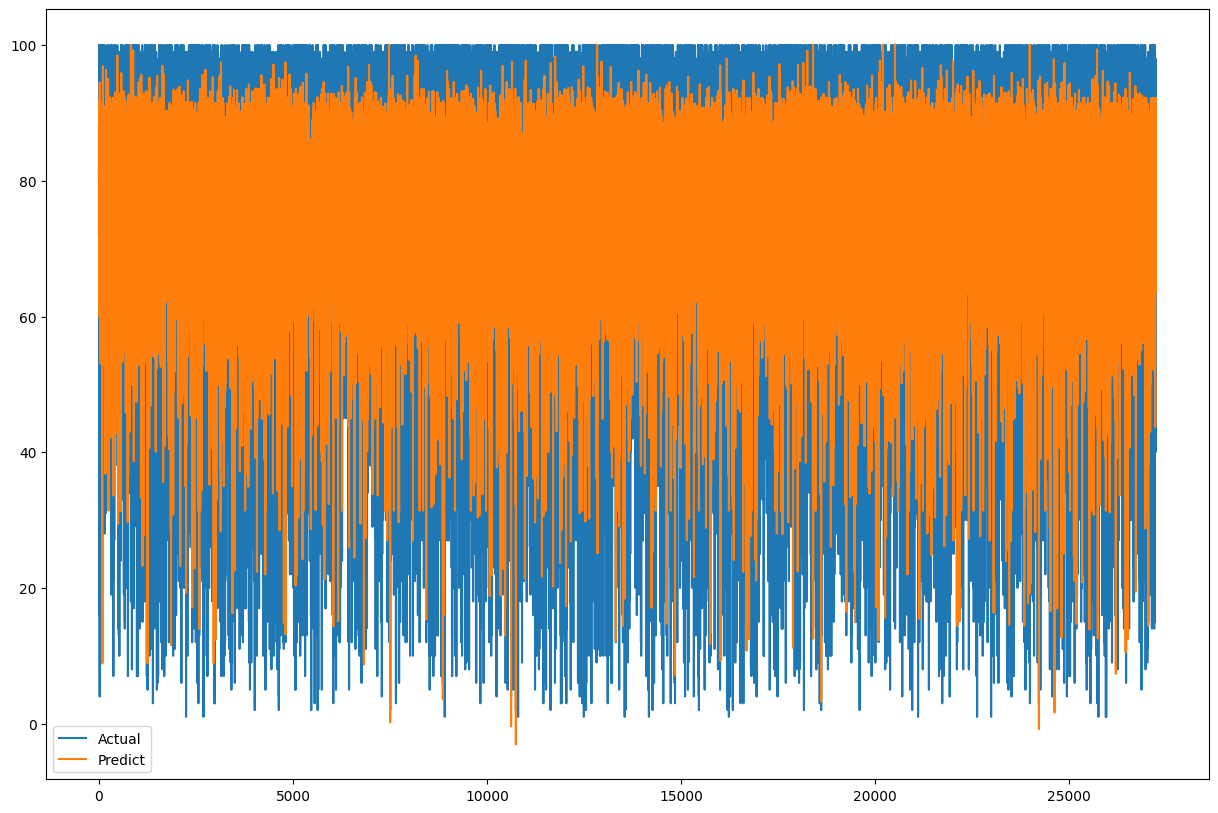

In [172]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(y_test_3)), y_test_3, label="Actual")
plt.plot(np.arange(len(y_test_3)), y_pred, label="Predict")

plt.legend()
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\1827198457.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(len(y_test_3[:300])), y_test_3[:300], label="Actual")
C:\Users\nikit\AppData\Local\Temp\ipykernel_15320\1827198457.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(len(y_test_3[:300])), y_pred[:300], label="Predict")


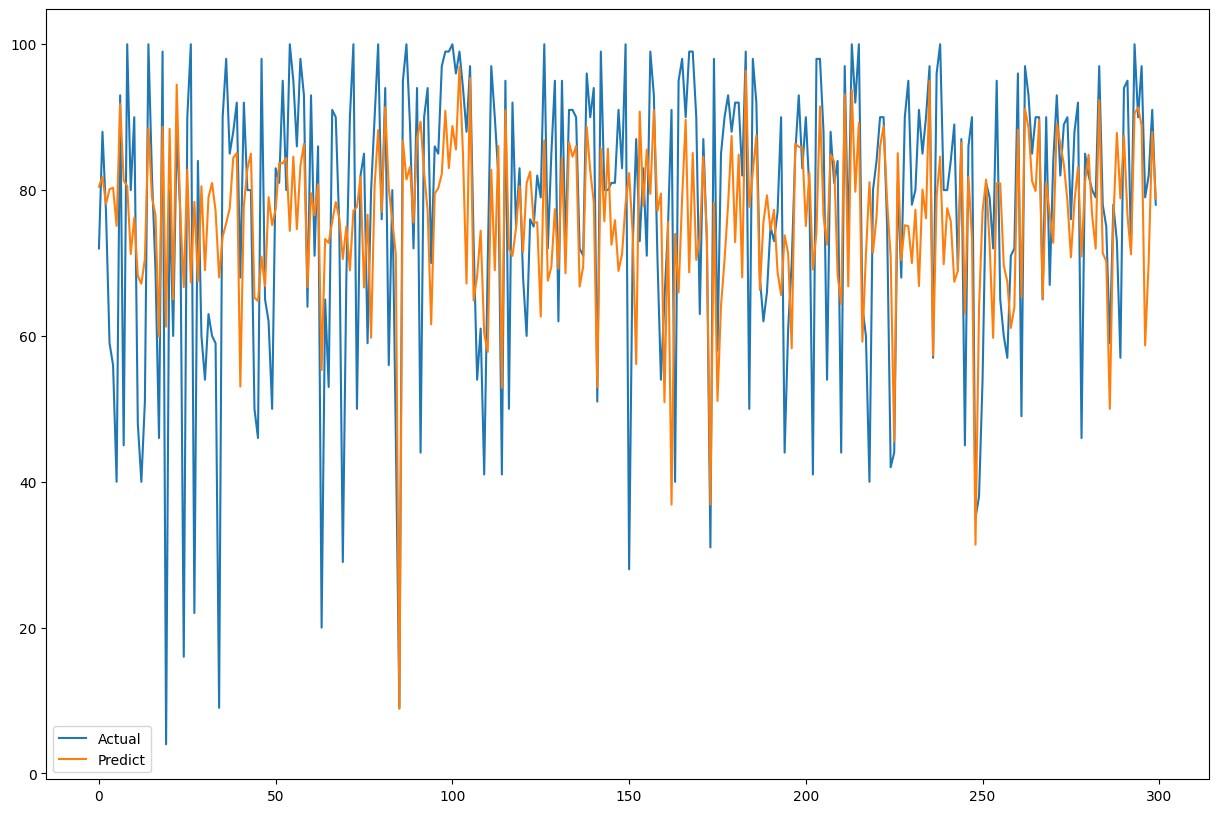

In [175]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(y_test_3[:300])), y_test_3[:300], label="Actual")
plt.plot(np.arange(len(y_test_3[:300])), y_pred[:300], label="Predict")

plt.legend()
plt.show()

In [180]:
from statsmodels.api import qqplot

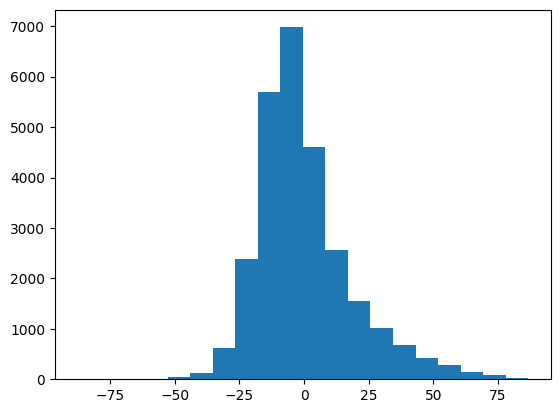

In [187]:
residuals = y_pred - y_test_3

plt.hist(residuals, bins=20)
plt.show()

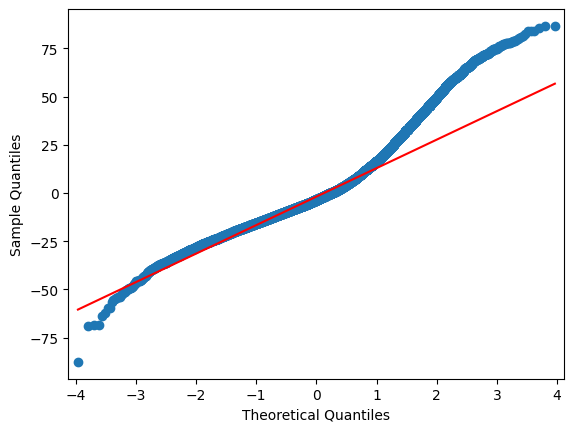

In [188]:
qqplot(residuals, line='q')
plt.show()

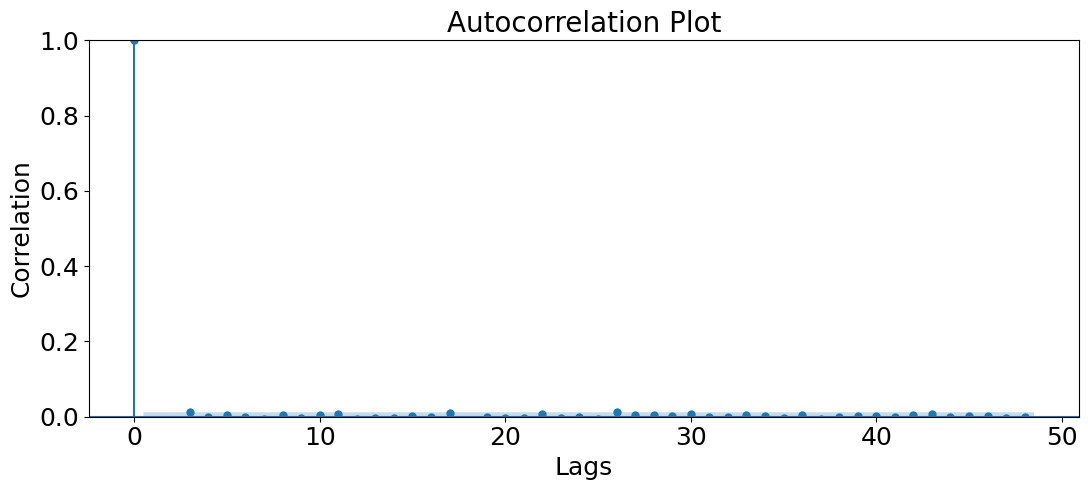

In [189]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(residuals, lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()